# Part I - (Prosper Loan Data)
## by (Jesse Kimaru)

## Introduction
This data set contains information on peer to peer loans facilitated by Prosper credit company


## Preliminary Wrangling


In [60]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [61]:
prosper_df = pd.read_csv('prosperLoanData.csv',)

In [62]:
prosper_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [63]:
prosper_df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [64]:
prosper_df.sample(10)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
72146,E09A359719059600677063A,1111119,2013-12-26 15:25:53.367000000,NaN,60,Current,NaN,0.23984,0.2150,0.2050,...,-12.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
105176,7FF1350575035037467332C,491079,2011-01-19 13:52:22.907000000,NaN,36,Completed,2011-11-07 00:00:00,0.35643,0.3199,0.3099,...,-45.96,0.0,0.0,0.0,0.0,1.0,0,0,0.0,146
110252,2B7C3556109377423FB38CD,627757,2012-08-21 18:34:36.030000000,NaN,60,Chargedoff,2013-05-30 00:00:00,0.26887,0.2433,0.2333,...,-9.90,0.0,2893.3,2893.3,0.0,1.0,0,0,0.0,18
66131,F6B133664163580407930F9,810,2006-02-26 17:45:54.230000000,C,36,Completed,2009-03-03 00:00:00,0.16194,0.1500,0.1450,...,-12.44,0.0,0.0,0.0,0.0,1.0,0,0,0.0,13
33354,FE313553176970200C2CE1F,613544,2012-07-18 07:39:40.817000000,NaN,36,Current,NaN,0.35797,0.3177,0.3077,...,-52.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,52
93853,FACE3589384820389E6027B,923498,2013-09-23 17:43:56.673000000,NaN,36,Completed,2013-10-18 00:00:00,0.18479,0.1485,0.1385,...,-4.93,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
106790,86BD3504096462532D2B79E,489962,2011-01-05 09:56:47.713000000,NaN,36,Completed,2012-11-08 00:00:00,0.15549,0.1340,0.1240,...,-67.38,0.0,0.0,0.0,0.0,1.0,0,0,0.0,94
14930,F9CD35772142735662771E9,763324,2013-04-29 10:48:07.537000000,NaN,60,Completed,2013-12-02 00:00:00,0.14965,0.1269,0.1169,...,-83.06,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
71883,741935310503909598B7DAD,536158,2011-10-28 21:18:34.850000000,NaN,36,Current,NaN,0.08882,0.0854,0.0754,...,-373.02,0.0,0.0,0.0,0.0,1.0,0,0,0.0,271
35308,9E1C35348846913864655A7,547263,2011-12-28 11:13:31.683000000,NaN,36,Current,NaN,0.19108,0.1621,0.1521,...,-219.02,0.0,0.0,0.0,0.0,1.0,0,0,0.0,6


Note that this data set contains 81 columns. For the purpose of this analysis I’ve took the following columns (variables):

In [65]:
target_columns =  [
    'Term', 'LoanStatus', 'BorrowerRate', 'ProsperRating (Alpha)', 'ListingCategory (numeric)', 'EmploymentStatus',
    'DelinquenciesLast7Years', 'StatedMonthlyIncome', 'TotalProsperLoans', 'LoanOriginalAmount', 'LoanOriginationDate', 'Recommendations', 'Investors', 'PercentFunded', 'MonthlyLoanPayment', 'LoanOriginationQuarter',
]

In [66]:
target_df = prosper_df[target_columns]

In [67]:
target_df.sample(10)

,Term,LoanStatus,BorrowerRate,ProsperRating (Alpha),ListingCategory (numeric),EmploymentStatus,DelinquenciesLast7Years,StatedMonthlyIncome,TotalProsperLoans,LoanOriginalAmount,LoanOriginationDate,Recommendations,Investors,PercentFunded,MonthlyLoanPayment,LoanOriginationQuarter
98346,36,Current,0.2346,D,1,Employed,3.0,11000.000000,NaN,10000,2013-06-26 00:00:00,0,1,1.0,389.50,Q2 2013
73295,60,Chargedoff,0.2610,D,3,Self-employed,0.0,16500.000000,1.0,12500,2012-04-24 00:00:00,0,19,1.0,375.00,Q2 2012
105539,36,Completed,0.1029,A,7,Employed,0.0,2584.416667,3.0,4000,2011-07-18 00:00:00,0,70,1.0,129.61,Q3 2011
51215,36,Current,0.2566,D,1,Employed,0.0,5916.666667,NaN,10000,2013-05-31 00:00:00,0,1,1.0,401.10,Q2 2013
112760,36,Current,0.2699,E,1,Employed,21.0,4583.333333,NaN,9000,2013-10-03 00:00:00,0,68,1.0,367.38,Q4 2013
101403,60,Current,0.2474,E,1,Employed,0.0,3830.000000,NaN,7000,2014-01-27 00:00:00,0,1,1.0,204.39,Q1 2014
100342,36,Current,0.0799,AA,1,Employed,0.0,15000.000000,NaN,20000,2013-06-25 00:00:00,0,351,1.0,626.64,Q2 2013
19632,36,Current,0.3099,E,3,Full-time,3.0,6250.000000,1.0,7500,2011-08-23 00:00:00,0,14,1.0,322.47,Q3 2011
36839,36,Completed,0.1100,A,3,Full-time,0.0,2884.250000,NaN,1000,2009-10-22 00:00:00,0,34,1.0,32.74,Q4 2009
41293,60,Current,0.1299,A,1,Employed,0.0,4000.000000,NaN,15000,2013-10-17 00:00:00,0,242,1.0,341.22,Q4 2013


Since Prosper use their own proprietary Prosper Rating only since 2009, we have a lot of missing values in ProsperRating column.

In [68]:
target_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 16 columns):
Term                         113937 non-null int64
LoanStatus                   113937 non-null object
BorrowerRate                 113937 non-null float64
ProsperRating (Alpha)        84853 non-null object
ListingCategory (numeric)    113937 non-null int64
EmploymentStatus             111682 non-null object
DelinquenciesLast7Years      112947 non-null float64
StatedMonthlyIncome          113937 non-null float64
TotalProsperLoans            22085 non-null float64
LoanOriginalAmount           113937 non-null int64
LoanOriginationDate          113937 non-null object
Recommendations              113937 non-null int64
Investors                    113937 non-null int64
PercentFunded                113937 non-null float64
MonthlyLoanPayment           113937 non-null float64
LoanOriginationQuarter       113937 non-null object
dtypes: float64(6), int64(5), object(5)
memory usage: 13.9

In [69]:
target_df.describe()

,Term,BorrowerRate,ListingCategory (numeric),DelinquenciesLast7Years,StatedMonthlyIncome,TotalProsperLoans,LoanOriginalAmount,Recommendations,Investors,PercentFunded,MonthlyLoanPayment
count,113937.000000,113937.000000,113937.000000,112947.000000,1.139370e+05,22085.000000,113937.00000,113937.000000,113937.000000,113937.000000,113937.000000
mean,40.830248,0.192764,2.774209,4.154984,5.608026e+03,1.421100,8337.01385,0.048027,80.475228,0.998584,272.475783
std,10.436212,0.074818,3.996797,10.160216,7.478497e+03,0.764042,6245.80058,0.332353,103.239020,0.017919,192.697812
min,12.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1000.00000,0.000000,1.000000,0.700000,0.000000
25%,36.000000,0.134000,1.000000,0.000000,3.200333e+03,1.000000,4000.00000,0.000000,2.000000,1.000000,131.620000
50%,36.000000,0.184000,1.000000,0.000000,4.666667e+03,1.000000,6500.00000,0.000000,44.000000,1.000000,217.740000
75%,36.000000,0.250000,3.000000,3.000000,6.825000e+03,2.000000,12000.00000,0.000000,115.000000,1.000000,371.580000
max,60.000000,0.497500,20.000000,99.000000,1.750003e+06,8.000000,35000.00000,39.000000,1189.000000,1.012500,2251.510000


In [70]:
#drop missing values
target_df = target_df.dropna(subset=['ProsperRating (Alpha)']).reset_index()

In [71]:
#Convert LoanOriginationDate to datetime datatype
target_df['LoanOriginationDate'] = pd.to_datetime(target_df['LoanOriginationDate'])

In [72]:
target_df['TotalProsperLoans'] = target_df['TotalProsperLoans'].fillna(0)

In [73]:
target_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84853 entries, 0 to 84852
Data columns (total 17 columns):
index                        84853 non-null int64
Term                         84853 non-null int64
LoanStatus                   84853 non-null object
BorrowerRate                 84853 non-null float64
ProsperRating (Alpha)        84853 non-null object
ListingCategory (numeric)    84853 non-null int64
EmploymentStatus             84853 non-null object
DelinquenciesLast7Years      84853 non-null float64
StatedMonthlyIncome          84853 non-null float64
TotalProsperLoans            84853 non-null float64
LoanOriginalAmount           84853 non-null int64
LoanOriginationDate          84853 non-null datetime64[ns]
Recommendations              84853 non-null int64
Investors                    84853 non-null int64
PercentFunded                84853 non-null float64
MonthlyLoanPayment           84853 non-null float64
LoanOriginationQuarter       84853 non-null object
dtypes: datetime

### What is the structure of your dataset?

This dataset contains 113937 loans with 81 different variables.


### What is/are the main feature(s) of interest in your dataset?

What are the features that can be used to predict a borrower from defaulting on credit. 
What are the major factors that is connected with prosper credit rating 
How much are they paying in interest.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I think that the borrowers Prosper rating will have the highest impact on chances of default. Also I expect that loan amount will play a major role and maybe the category of credit. Prosper rating will depend on stated income and employment status. I also think that the borrowers stated monthly income, loan term, Prosper rating, employment status will also have effects on the APR.

## Univariate Exploration

### Loan status

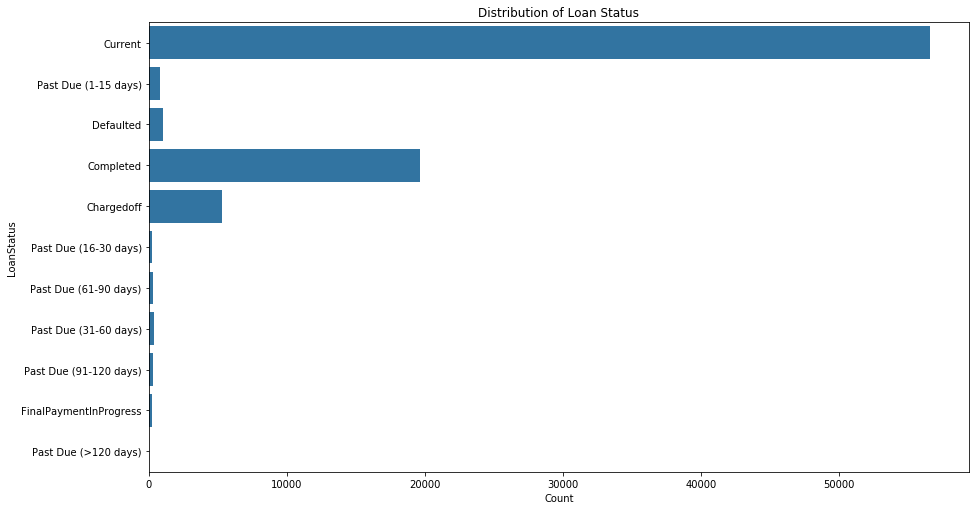

In [74]:
base_color = sb.color_palette()[0]
plt.figure(figsize=[14.70, 8.27])
sb.countplot(data=target_df, y='LoanStatus', color = base_color)
plt.title('Distribution of Loan Status')
plt.ylabel('LoanStatus')
plt.xlabel('Count')
plt.show()

Majority of the members loan status is on current mode followed by the completed group. We can also observe that there are defaulted loans and a posibility of the number increasing due to some status being past due where the chargedoff has a quite high number of people coming in as the third largest group.

## What is the distribution of the Loan Amount?

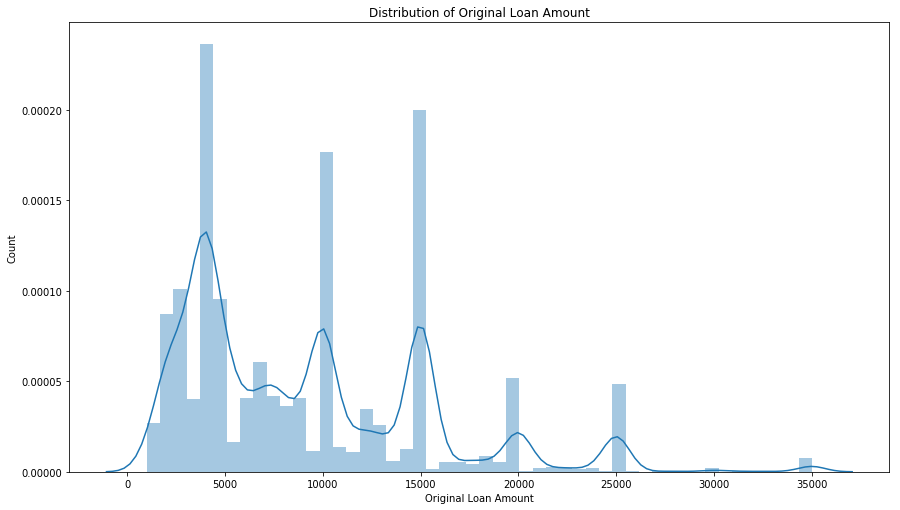

In [75]:
plt.figure(figsize=[14.70, 8.27])
sb.distplot( target_df['LoanOriginalAmount'], bins=50)
plt.title('Distribution of Original Loan Amount')
plt.xlabel('Original Loan Amount')
plt.ylabel('Count')
plt.show()

It is seen that loans between the bracket of 2000 to 10000 are popular, and those of between the range of 15000 upwards are not so popular.

## How much contribution do members make on Monthly Loan Payment?

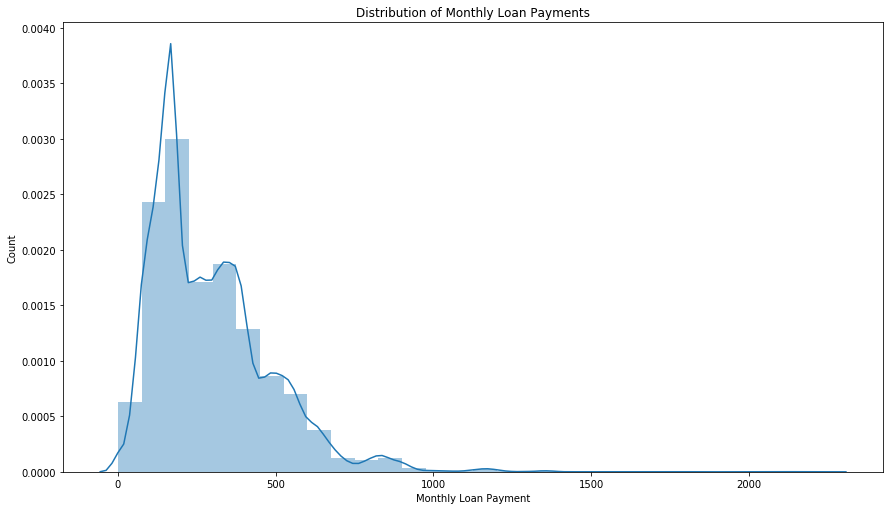

In [76]:
plt.figure(figsize=[14.70, 8.27])
sb.distplot(target_df['MonthlyLoanPayment'], bins=30)
plt.title('Distribution of Monthly Loan Payments')
plt.xlabel('Monthly Loan Payment')
plt.ylabel('Count')
plt.show()

We can see that more than half of the borrowers make payments of less than 500 to service their loans on a monthly basis.

### Employment Status

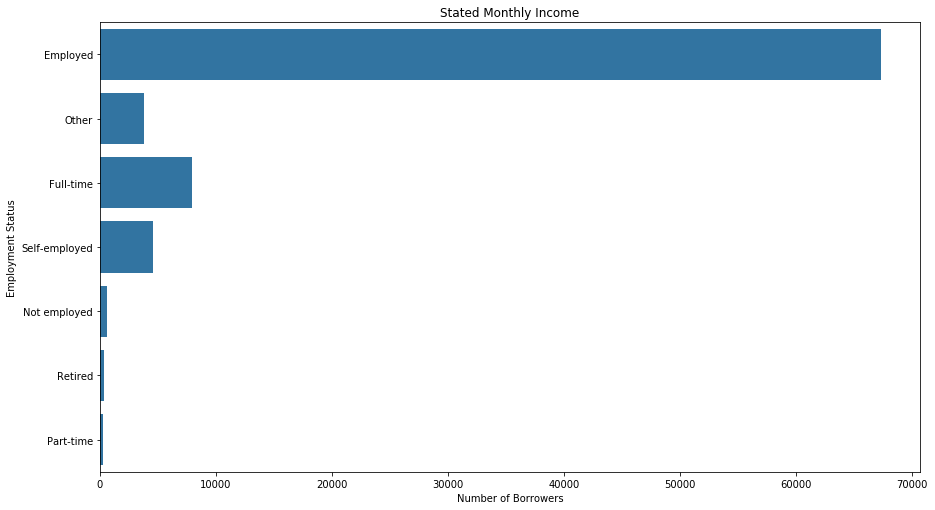

In [77]:
plt.figure(figsize=[14.70, 8.27])
sb.countplot(data=target_df, y ='EmploymentStatus', color = base_color)
plt.ylabel('Employment Status')
plt.xlabel('Number of Borrowers');
plt.title('Stated Monthly Income');

It is evident that the chances of geting a loan from Prosper one needs to be in employment, Either full-time, self-employed or any other form of employment.

### Stated Monthly Income


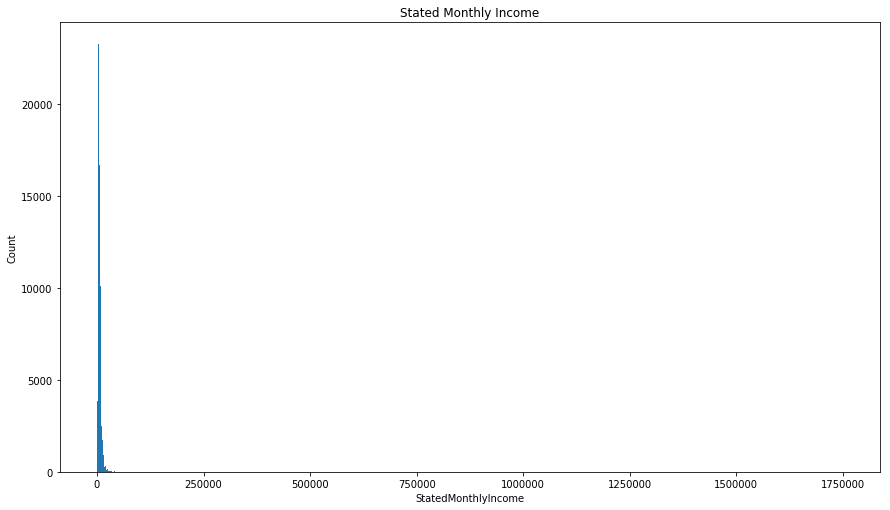

In [78]:
plt.figure(figsize=[14.70, 8.27])
plt.hist(data=target_df, x='StatedMonthlyIncome', bins=1000);
plt.xlabel('StatedMonthlyIncome')
plt.ylabel('Count')
plt.title('Stated Monthly Income');

Distribution of stated monthly income is highly skewed to the right. so, we have to check how many outliers are there

It is evident that the chances of geting a loan from Prosper one needs to be in employment, Either full-time, self-employed or any other form of employment.

In [79]:
income_std = target_df['StatedMonthlyIncome'].std()
income_mean = target_df['StatedMonthlyIncome'].mean()
boundary = income_mean + income_std * 3
len(target_df[target_df['StatedMonthlyIncome'] >= boundary])

245

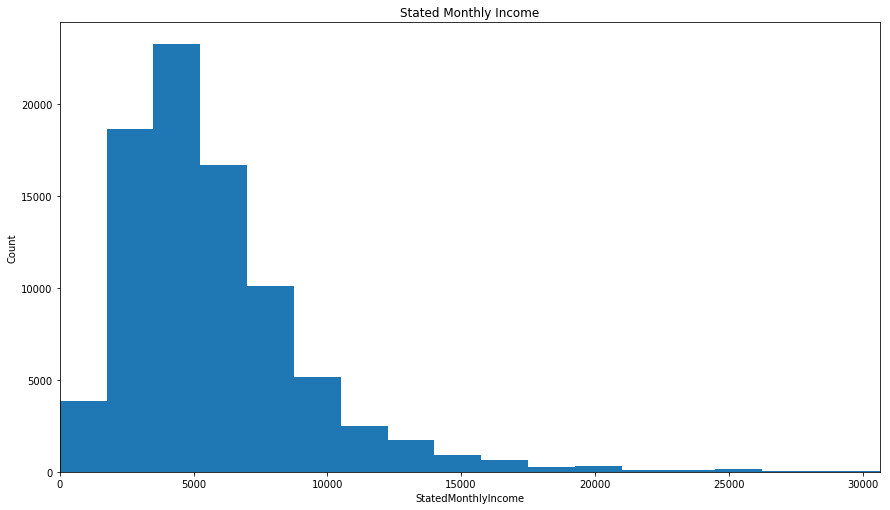

In [80]:
#After Zooming the Graph We Get This
plt.figure(figsize=[14.70, 8.27])

plt.hist(data=target_df, x ='StatedMonthlyIncome', bins=1000);
plt.xlabel('StatedMonthlyIncome')
plt.ylabel('Count')
plt.xlim(0, boundary)
plt.title('Stated Monthly Income');

With a boundary of mean and 3 times standard deviations distribution of monthly income still has noticeable right skew but now we can see that mode is about 5000.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

Distribution of monthly stated income had alot of outliers and very large range but still it was right skew. One needs a form of employment for their chances of geting a loan to increase, having a large sum of loans being current type.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

The majority of loans are actually current loans. Since our main goal is to define driving factors of outcome of loan we are not interested in any current loans.


## Bivariate Exploration

In [81]:
#adjusting the form of data
condition = (target_df['LoanStatus'] == 'Completed') | (target_df['LoanStatus'] == 'Defaulted') |\
                  (target_df['LoanStatus'] == 'Chargedoff')
target_df = target_df[condition]

def change_to_defaulted(row):
    if row['LoanStatus'] == 'Chargedoff':
        return 'Defaulted'
    else:
        return row['LoanStatus']
    
target_df['LoanStatus'] = target_df.apply(change_to_defaulted, axis=1)
target_df['LoanStatus'].value_counts()

Completed    19664
Defaulted     6341
Name: LoanStatus, dtype: int64

In [82]:
categories = {1: 'Debt Consolidation', 2: 'Home Improvement', 3: 'Business', 6: 'Auto', 7: 'Other'}
def reduce_categorie(row):
    loan_category = row['ListingCategory (numeric)']
    if  loan_category in categories:
        return categories[loan_category]
    else:
        return categories[7]
    
target_df['ListingCategory (numeric)'] = target_df.apply(reduce_categorie, axis=1)
target_df['ListingCategory (numeric)'].value_counts()

Debt Consolidation    12740
Other                  7083
Home Improvement       2612
Business               2366
Auto                   1204
Name: ListingCategory (numeric), dtype: int64

Variable Listing Category is set up as numeric and most of the values have very low frequency, for the easier visualization so we have change it to categorical and reduce the number of categories

### What is the realationship between LoanStatus and Prosper Rating?

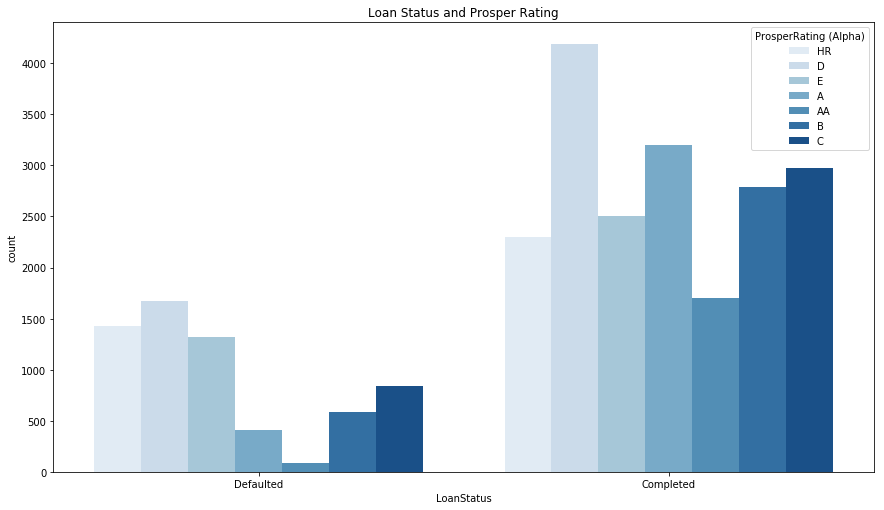

In [83]:
plt.figure(figsize=[14.70, 8.27])

sb.countplot(data = target_df, x = 'LoanStatus', hue = 'ProsperRating (Alpha)', palette = 'Blues');
plt.title('Loan Status and Prosper Rating');

Category D has both the most defaulted loan status and also frequent rating among completed, with the second highest being category A.

### Relationship between Loan Status and Listing Category

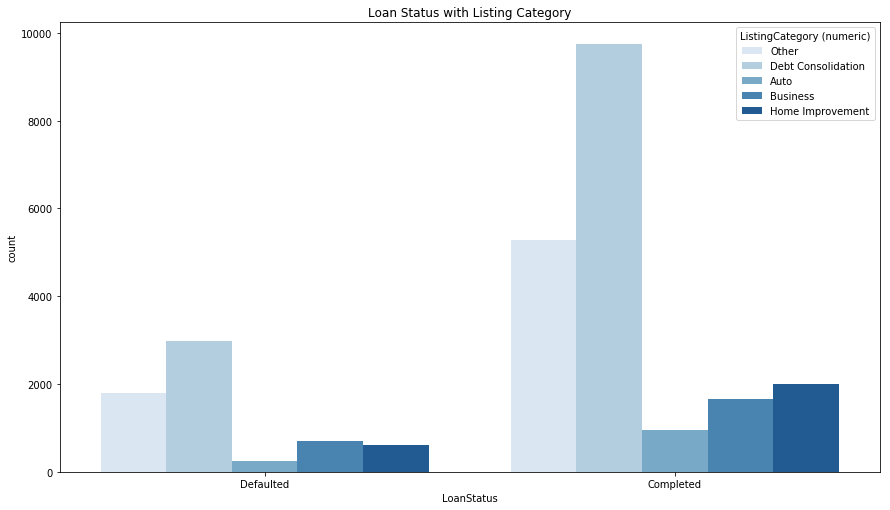

In [84]:
plt.figure(figsize=[14.70, 8.27])

sb.countplot(data = target_df, x = 'LoanStatus', hue = 'ListingCategory (numeric)', palette = 'Blues');
plt.title('Loan Status with Listing Category');

In both of the Graphs the debt Consolidation has the most frequency among all of them followed by Other

## Which income group has most defaults?

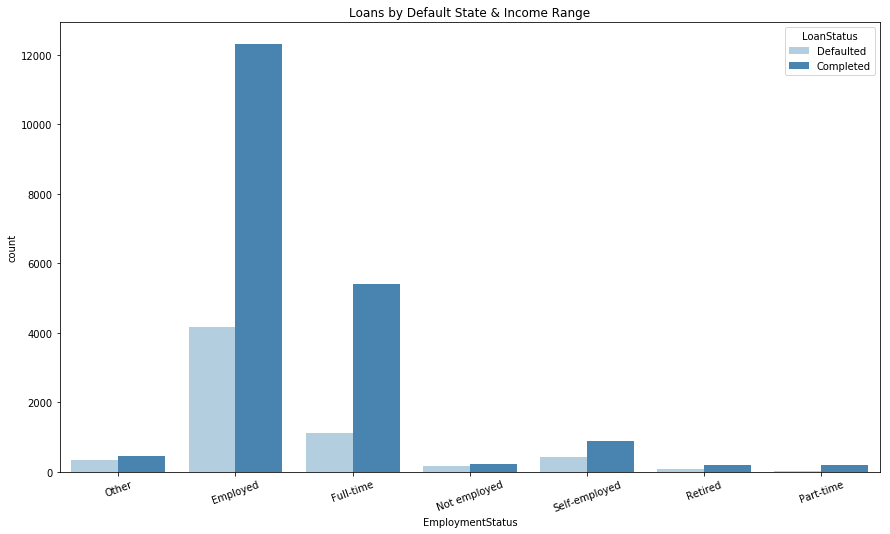

In [85]:
plt.figure(figsize=[14.70, 8.27])
sb.countplot(data = target_df, x = 'EmploymentStatus', hue = 'LoanStatus', palette = 'Blues');
plt.xticks(rotation = 20);
plt.title('Loans by Default State & Income Range');

All the groups have some defaulted loans but the employed have the greatest number.

## What is the Loan Status compared to Loan Amount?

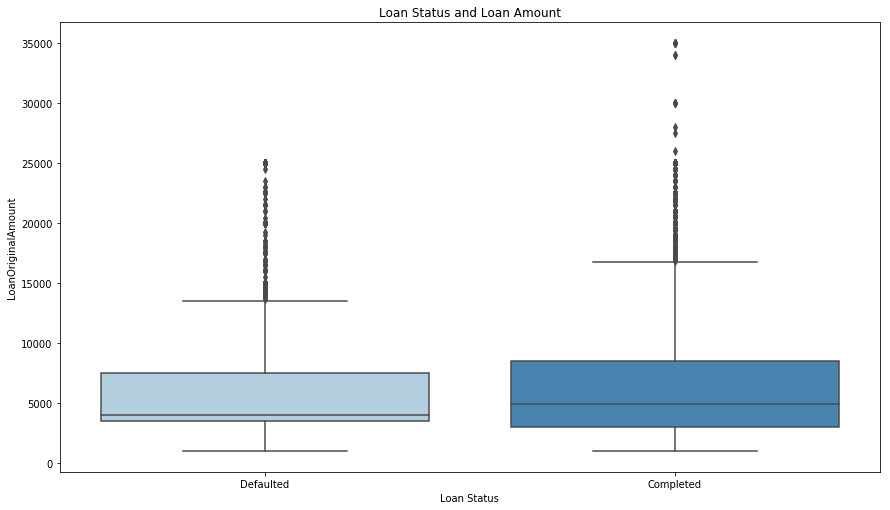

In [86]:
plt.figure(figsize=[14.70, 8.27])
sb.boxplot(x='LoanStatus', y='LoanOriginalAmount', data=target_df, palette = 'Blues')
plt.xlabel('Loan Status')
plt.ylabel('LoanOriginalAmount')
plt.title('Loan Status and Loan Amount');
plt.show()

A large number of borrowers have completed their loan compared to defaulted ones.

## What is the relationships between Credit category, Credit rating and outcome of Credit?

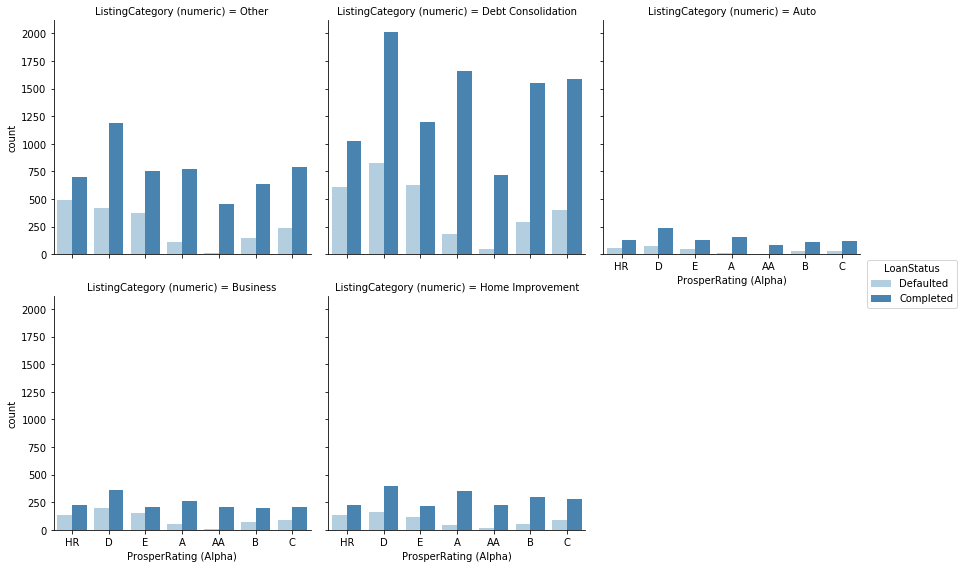

In [87]:
plt.figure(figsize=[3, 3])
sb.factorplot (x = 'ProsperRating (Alpha)', hue = 'LoanStatus', col = 'ListingCategory (numeric)',
               data = target_df, kind = 'count',palette = 'Blues', col_wrap = 3);

There is no substantial difference on default rates compared with the different categories based on ratings. 

## Has there been an increase of Loan Amounts given over different Quarter ?

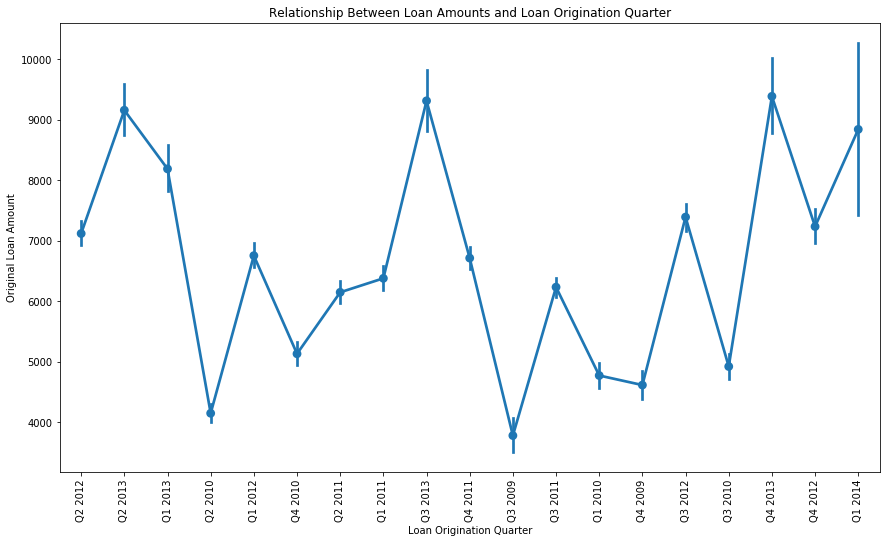

In [88]:
plt.figure(figsize=[14.70, 8.27])
sb.pointplot(y='LoanOriginalAmount', x='LoanOriginationQuarter',
            data=target_df)
plt.title('Relationship Between Loan Amounts and Loan Origination Quarter')
plt.xticks(rotation = 90);
plt.ylabel('Original Loan Amount')
plt.xlabel('Loan Origination Quarter')
plt.show()

Despite a sharp decline of Loan amounts being given from 2013 to 2019, a progressive increase was seen from 2009 of loans being issues.

## What is the relationship between Prosper Rating and Employment Status?

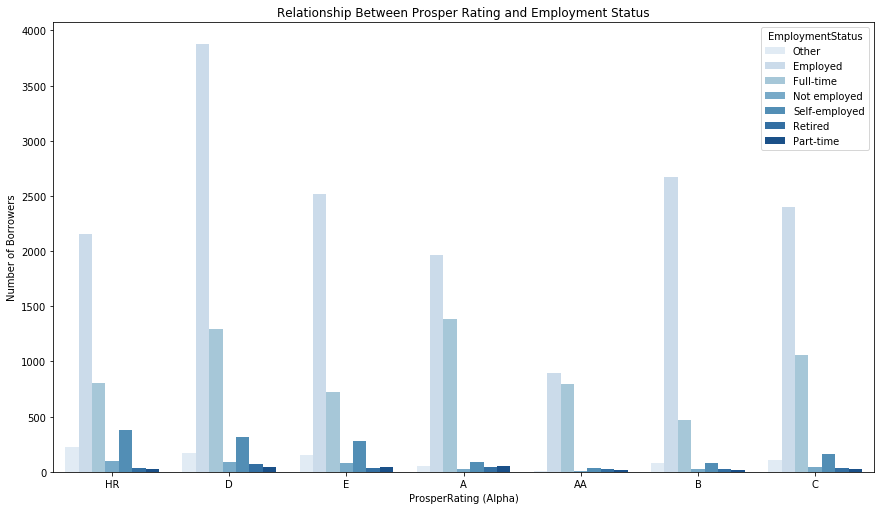

In [89]:
plt.figure(figsize=[14.70, 8.27])
sb.countplot(hue='EmploymentStatus', x='ProsperRating (Alpha)', data=target_df, palette = 'Blues')
plt.title('Relationship Between Prosper Rating and Employment Status')
plt.ylabel('Number of Borrowers')
plt.xlabel('ProsperRating (Alpha)')
plt.show()

Category of members with lower rating is seen to be of Not Employed, Self-Employed, Retired and Part-Time employment status.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

In Loan status vs Loan amount defaulted credits tend to be smaller than completed credits onces. Employment status of individuals with lower ratings tends to be in categories of 'Not employed', 'Self-employed', 'Retired' or 'Part-time', employed category has the highest ratings

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

Prosper rating AA has the list frequent rating among defaulted credits. Borrowers with better ratings have a better monthly income thus can get a higher loan level. 

## Multivariate Exploration

### Rating, Loan Amount and Loan Status


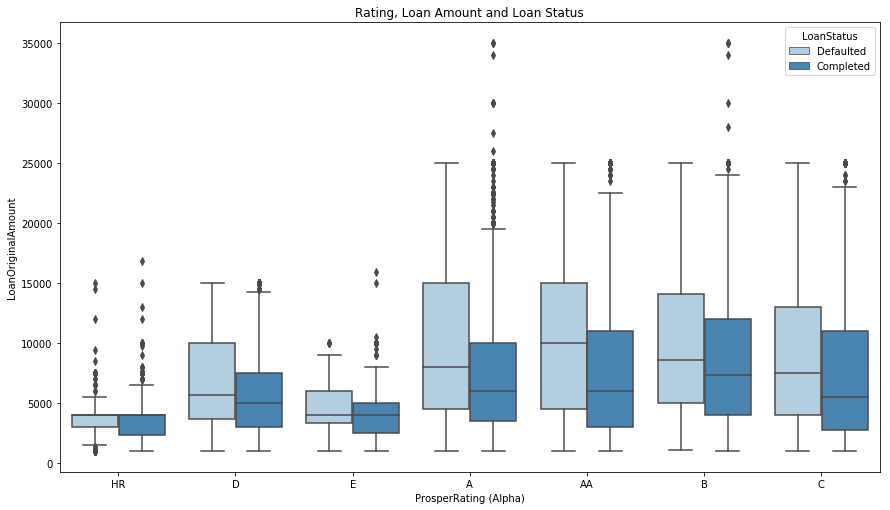

In [90]:
plt.figure(figsize=[14.70, 8.27])
sb.boxplot(data=target_df, x='ProsperRating (Alpha)', y='LoanOriginalAmount', hue='LoanStatus',palette = 'Blues');
plt.title('Rating, Loan Amount and Loan Status');

Except for the lowest ratings defaulted credits tend to be larger than completed.
Most of the defaulted credits comes from individuals with low Prosper rating.

### Does Loan Original Amount, Listing Category Loan and Loan Status Interact?

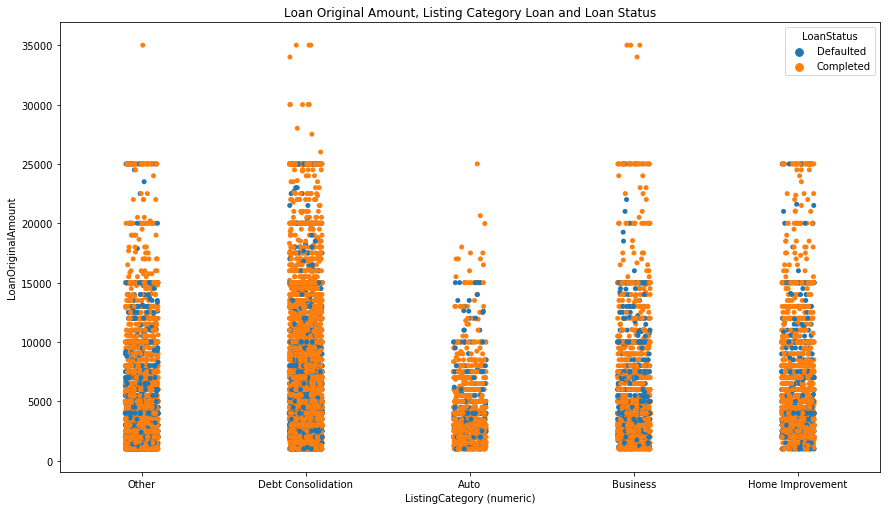

In [91]:
plt.figure(figsize=[14.70, 8.27])
sb.stripplot(data=target_df, x='ListingCategory (numeric)', y='LoanOriginalAmount', hue='LoanStatus', jitter=True);
plt.title('Loan Original Amount, Listing Category Loan and Loan Status');

Apart from Auto, Business and Home Improvement category do not have nearly equal mean among all of them.

## Does Terms affect  LoanOriginalAmount or StatedMonthlyIncome ?

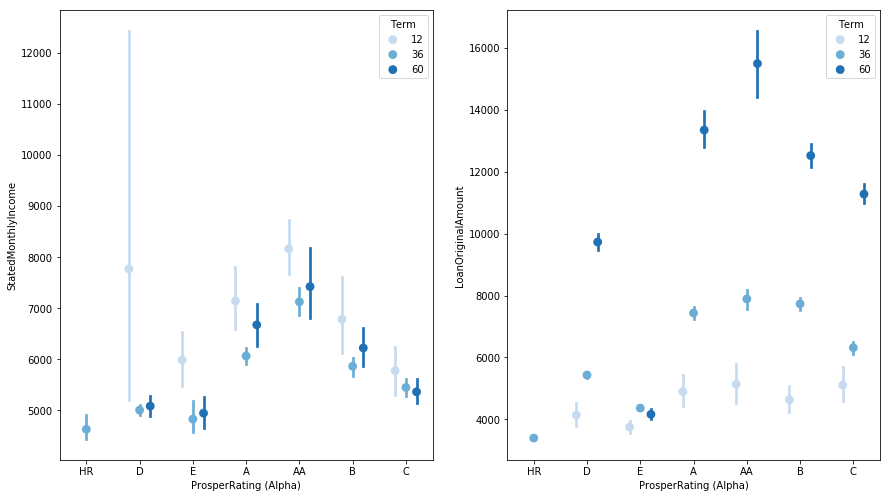

In [92]:
fig, ax = plt.subplots(ncols=2, figsize=[14.70, 8.27])
sb.pointplot(data = target_df, x = 'ProsperRating (Alpha)', y = 'StatedMonthlyIncome', hue = 'Term',
           palette = 'Blues', linestyles = '', dodge = 0.4, ax=ax[0])
sb.pointplot(data = target_df, x = 'ProsperRating (Alpha)', y = 'LoanOriginalAmount', hue = 'Term',
           palette = 'Blues', linestyles = '', dodge = 0.4, ax=ax[1]);

We can see that there is no effect between Terms and Ratings on Stated monthly income, but for loan amount, there is an effect on Terms and ratings since where the Prosper ratings are good the loan amounts of the three Terms increase progressively.  

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

It is visible that a higher credit rating improves the chances of credit not being defaulted.

### Were there any interesting or surprising interactions between features?

Individuals with a higher prosper rating defaulted on credit more than completed credits.